In [1]:
import numpy as np
from matplotlib.pyplot import *

In [2]:
%matplotlib inline

This tutorial explains how to estimate the exponent of a powerlaw distribution using a least squares estimator. A powerlaw distribution over a variable x is defined as $p(x) = c x^{-k}$, where k is the powerlaw coefficient and is usually in the range between 2 and 4 while c is some constant (sometimes choosen to normalize the distribution). Although the powerlaw distribution can appear very similar to an exponential distribution (see the plot on the left below), it has a heavy tail which becomes obvious by the typical line in the log-log plot (on the right):

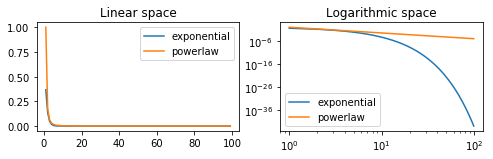

In [9]:
x_pts = np.arange(1, 100)
y_exp = np.exp(-x_pts)
y_plw = 1/x_pts**2.5 + 0

figure(figsize=(8, 2))
subplot(121)
title('Linear space')
plot(x_pts, y_exp, label='exponential')
plot(x_pts, y_plw, label='powerlaw')
legend()
subplot(122)
title('Logarithmic space')
loglog(x_pts, y_exp, label='exponential')
loglog(x_pts, y_plw, label='powerlaw')
legend()

First, we generate a mock dataset that follows a powerlaw distribution with the powerlaw coefficient of 2.1. In practice, this coefficient is unknown so we will have to estimate it given a finite set of observations.

In [76]:
k = 2.1                # powerlaw coefficient
y_pts = 1/x_pts**k     # distribution (notice coefficient C=1)

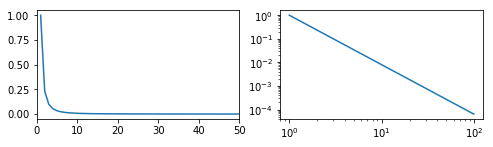

In [77]:
figure(figsize=(8,2))
subplot(121)
plot(x_pts, y_pts)
xlim(0, 50)
subplot(122)
loglog(x_pts, y_pts)
show()

## 1. Generate simulated observed dataset

We first pick `nr_pts` randomly from the continuous distribution above. This simulates experimetnally recorded datapoints we regard as our observations. Note that on a log-log plot points bunch in the lower right corner, as on a log-scale those intervals contian more data points (i.e., an interval between $10^0$ and $10^1$ contains just 9 data points, while an interval between $10^1$ and $10^2$ contains 99 points).

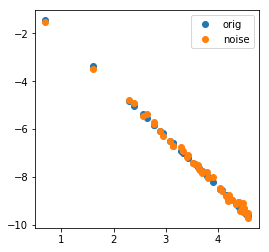

In [79]:
nr_pts = 50

indices = np.random.choice(x_pts, size=nr_pts)
rnd_idx = np.sort(indices)

x_ss, y_ss = np.log(x_pts[rnd_idx]), np.log(y_pts[rnd_idx])

x = x_ss
y = y_ss + 0.1*np.random.normal(size=nr_pts)  # noise, could simulate effects of data collection

#"""
figure(figsize=(4,4))
plot(x_ss, y_ss, 'o', label='orig')
plot(x, y, 'o', label='noise')
legend()
#"""

## 2. Estimate the powerlaw coefficients

Now, we are trying to estimate the original points, given only the observed dataset (orange points above).

We start by estimating the line on a log-log plot (our data are projected with a non-linear transformation) using simple linear regression:

In [80]:
reg = np.polyfit(x, y, 1)
y_est = reg[0]*x + reg[1]
print(reg)

[-2.07815155 -0.05840515]


These coefficients determine the slope and offset in the log-space (shown in the left plot below), but it can be easily shown that the slope of the line corresponds to the powerlaw coefficient, and the offest on the y-axis to the logarihtm of the normalizing coefficient:

$p = c x^{k}$   /$\log$

$\log p = \log c + \log (x^k)$

$\log p = l + k \log (x)$ where $l=\log c$

which is an expression describing the line in the log-log plot.

We can see that the first regressed coefficient (k) is close to 2.1 and the second one (l) is close to zero, which taken to an exponent gives 1 (c). This is pretty close to the coefficients we chose above.

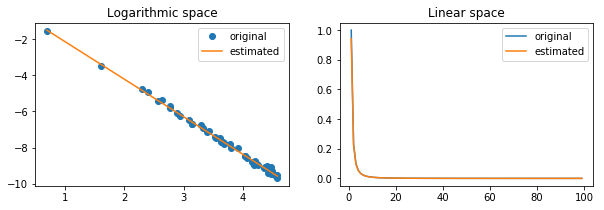

In [82]:
figure(figsize=(10, 3))
subplot(121)
title('Logarithmic space')
plot(x, y, 'o', label='original')
plot(x, y_est, label='estimated')
legend()
subplot(122)
title('Linear space')
plot(x_pts, y_pts, label='original')
plot(x_pts, np.exp(reg[1])*x_pts**reg[0], label='estimated')
legend()

Alternatively, it is possible to estimate the power-law coefficient using the maximum likelihood estimation. How this is done is outlined in the Appendix B of [this](https://arxiv.org/pdf/cond-mat/0412004.pdf) great paper that provides comprehensive summary of powerlaw distributions and their properties.